In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
PATH_DATA='../dataset/'

In [20]:
df_csv=pd.read_csv(PATH_DATA+'food_delivery_datasets.csv')

In [21]:
df_csv

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587
...,...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


In [22]:
df_csv['date_time']=pd.to_datetime(df_csv['date_time']).dt.round('H')
df_csv['date_time']

0      2018-08-12 21:00:00
1      2018-09-23 18:00:00
2      2018-09-19 18:00:00
3      2018-09-21 01:00:00
4      2018-09-22 18:00:00
               ...        
1071   2018-09-20 15:00:00
1072   2018-07-26 15:00:00
1073   2018-08-21 20:00:00
1074   2018-07-16 15:00:00
1075   2018-09-11 14:00:00
Name: date_time, Length: 1076, dtype: datetime64[ns]

In [23]:
x=df_csv[['resto_id','status']]
x.head()

,resto_id,status
0,742638033,Completed
1,742767245,Completed
2,742618303,Completed
3,742541172,Completed
4,742604875,Completed


In [25]:
y=df_csv['date_time'].dt.strftime('%A')
y

0          Sunday
1          Sunday
2       Wednesday
3          Friday
4        Saturday
          ...    
1071     Thursday
1072     Thursday
1073      Tuesday
1074       Monday
1075      Tuesday
Name: date_time, Length: 1076, dtype: object

In [26]:
df_csv=pd.concat([x['resto_id'],y,x['status']], axis=1)
df_csv.columns=['resto_id','days','status']
df_csv.sample(10)

,resto_id,days,status
760,742538012,Saturday,Completed
106,742618679,Saturday,Completed
715,742539582,Tuesday,Completed
22,742656058,Tuesday,Cancelled
1017,742661458,Friday,Completed
479,742534610,Tuesday,Completed
1019,742671779,Thursday,Completed
263,742527575,Thursday,Completed
26,742676336,Saturday,Completed
419,742621769,Sunday,Cancelled


In [27]:
group_status=df_csv.groupby('status')
group_status['status'].size()

status
Cancelled    195
Completed    881
Name: status, dtype: int64

In [28]:
df_csv=df_csv[df_csv.status=='Completed']
df_csv.reset_index(drop=True)

,resto_id,days,status
0,742638033,Sunday,Completed
1,742767245,Sunday,Completed
2,742618303,Wednesday,Completed
3,742541172,Friday,Completed
4,742604875,Saturday,Completed
...,...,...,...
876,742742150,Thursday,Completed
877,742566851,Thursday,Completed
878,742571888,Tuesday,Completed
879,742725064,Monday,Completed


In [29]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_csv.groupby(['days']).size().reindex(days)

days
Monday       102
Tuesday      114
Wednesday    106
Thursday     106
Friday       123
Saturday     149
Sunday       181
dtype: int64

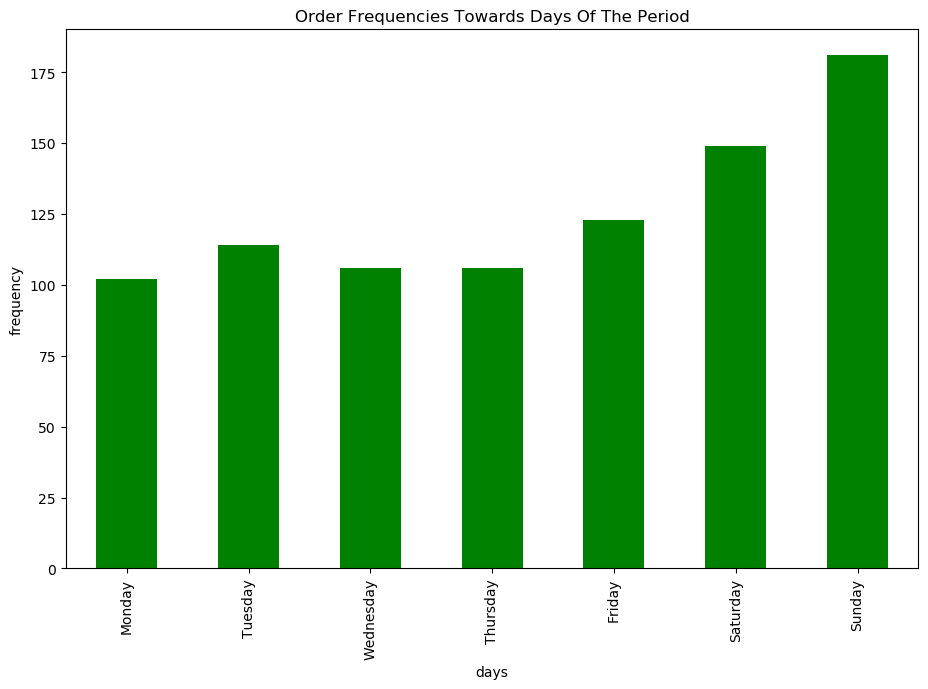

In [30]:
plot1=df_csv.groupby(['days']).size().reindex(days).plot(kind='bar', figsize=(11,7), xlabel='days', ylabel='frequency', title='Order Frequencies Towards Days Of The Period', color='green')
plot1.figure